# Laboratorio 1 - Parte 1

### Regresión polinomial múltiple

### 2019 - II

#### Profesor: Julián D. Arias Londoño
#### julian.ariasl@udea.edu.co


## Guía del laboratorio

En este archivo va a encontrar tanto celdas de código como celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

### Primer integrante:
Nombre: Jorge Hiler Ricardo


#### Segundo integrante:

Nombre: Santiago Gaviria Zapata


In [1]:
import numpy as np
import numpy.matlib as npMatlib
import matplotlib.pyplot as plt
import pandas as pd
#from scipy import stats

#Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")

train = pd.read_csv(r'DB/train.csv')

test = pd.read_csv(r'DB/test.csv')

naTrainResultantColumns = train.columns[train.isna().any()].tolist()
naTestColumns = test.columns[test.isna().any()].tolist()
print(naTrainResultantColumns)
print(naTestColumns)

['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']
['MSZoning', 'LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']


## Ejercicio 1: Contextualización del problema

El problema de *regresión* que abordaremos consiste en predecir el valor de la humedad absoluta en el aire, a partir de varias variables sensadas en el aire (Para más información sobre la base de datos y la contextualización del problema, consulte: http://archive.ics.uci.edu/ml/datasets/air+quality). Ejecute la siguiente celda para cargar los datos.

In [2]:


def fillNAs(train, test):
    naTrainColumns = train.columns[train.isna().any()].tolist()
    train[naTrainColumns[0]].fillna(train[naTrainColumns[0]].mean(), inplace = True)
    train[naTrainColumns[1]].fillna('None', inplace = True)
    train[naTrainColumns[2]].fillna(train[naTrainColumns[2]].mean(), inplace = True)
    train[naTrainColumns[3]].fillna('NA', inplace = True)
    train[naTrainColumns[4]].fillna('NA', inplace = True)
    train[naTrainColumns[5]].fillna('NA', inplace = True)
    train[naTrainColumns[6]].fillna('NA', inplace = True)
    train[naTrainColumns[7]].fillna('NA', inplace = True)
    train[naTrainColumns[8]].fillna('SBrkr', inplace = True)
    train[naTrainColumns[9]].fillna('NA', inplace = True)
    train[naTrainColumns[10]].fillna('NA', inplace = True)
    train[naTrainColumns[11]].fillna(train[naTrainColumns[11]].mean(), inplace = True)
    train[naTrainColumns[12]].fillna('NA', inplace = True)
    train[naTrainColumns[13]].fillna('NA', inplace = True)
    train[naTrainColumns[14]].fillna('NA', inplace = True)
    
    naTrainResultantColumns = train.columns[train.isna().any()].size
    print('Numero de columnas con valores NA: ', naTrainResultantColumns)
    
    naTestColumns = test.columns[test.isna().any()].tolist()
    
    test[naTestColumns[0]].fillna('RL', inplace = True)
    test[naTestColumns[1]].fillna(test[naTestColumns[1]].mean(), inplace = True)
    test[naTestColumns[2]].fillna('None', inplace = True)
    test[naTestColumns[3]].fillna(test[naTestColumns[3]].mean(), inplace = True)
    test[naTestColumns[4]].fillna('NA', inplace = True)
    test[naTestColumns[5]].fillna('NA', inplace = True)
    test[naTestColumns[6]].fillna('NA', inplace = True)
    test[naTestColumns[7]].fillna('NA', inplace = True)
    test[naTestColumns[8]].fillna(test[naTestColumns[8]].mean(), inplace = True)
    test[naTestColumns[9]].fillna('NA', inplace = True)
    test[naTestColumns[10]].fillna(test[naTestColumns[10]].mean(), inplace = True)
    test[naTestColumns[11]].fillna(test[naTestColumns[11]].mean(), inplace = True)
    test[naTestColumns[12]].fillna(test[naTestColumns[12]].mean(), inplace = True)
    test[naTestColumns[13]].fillna(test[naTestColumns[13]].mean(), inplace = True)
    test[naTestColumns[14]].fillna(test[naTestColumns[14]].mean(), inplace = True)
    test[naTestColumns[15]].fillna('NA', inplace = True)
    test[naTestColumns[16]].fillna('NA', inplace = True)
    test[naTestColumns[17]].fillna(test[naTestColumns[17]].mean(), inplace = True)
    test[naTestColumns[18]].fillna('NA', inplace = True)
    test[naTestColumns[19]].fillna(round(float(test[naTestColumns[19]].mean()), 1), inplace = True)
    test[naTestColumns[20]].fillna(test[naTestColumns[20]].mean(), inplace = True)
    test[naTestColumns[21]].fillna('NA', inplace = True)
    test[naTestColumns[22]].fillna('NA', inplace = True)
    
    naTestResultantColumns = train.columns[train.isna().any()].size
    print('Numero de columnas con valores NA: ', naTestResultantColumns)
    
    if (naTrainResultantColumns == 0 & naTestResultantColumns == 0):
        return print("Lllenado de campos vacíos completado")
    else: 
        return print("Llenado de campos vacíos erróneo")

fillNAs(train, test)


Numero de columnas con valores NA:  0
Numero de columnas con valores NA:  0
Lllenado de campos vacíos completado


#### Responda:

1.1 Cuántas muestras tiene la base de datos?: 




In [3]:

#Deleted columns 'cause had a lot of NA > 80%: 'Alley','Fence','MiscFeature','PoolQC'
#Deleted columns 'cause the std = 0: 'Utilities' %rep = 1, 'Street' %rep =1,
#'LandSlope' %rep = 0.95, Condition2 %rep = 1445/1460, RoofMatl %rep = 1434/1460, 
# Heating %rep = 1428/1460, LowQualFinSF %rep = 1436/1460, 
# PoolArea %rep = 1454/1460, 3SsnPorch %rep = 1438/1460

def deleteColumns(train, test):
    columnsToDelete = ['Id','Utilities','Street','LandSlope', 'Condition2', 'RoofMatl',  'Heating', 'LowQualFinSF', 'PoolArea', '3SsnPorch']
    train.drop(labels = columnsToDelete, axis = 1, inplace = True)
    test.drop(labels = columnsToDelete, axis = 1, inplace = True)
    
deleteColumns(train, test)

1.2 Cuántas caracteristicas tiene el problema?: 



In [4]:

def mergeTrainAndTest(train, test):
    trainToMerge = train.copy()
    Ytrain = trainToMerge['SalePrice'] 
    trainToMerge.drop(labels = 'SalePrice', axis = 1, inplace = True)
    trainToMerge['Set'] = 'train'
    testToMerge = test.copy()
    testToMerge['Set'] = 'test'
    db = trainToMerge.copy()
    db = db.append(testToMerge)
    return db, Ytrain

def convertToCategories(db):
    db['MSSubClass'] = db['MSSubClass'].astype('category')
    db["ExterQual"] = db["ExterQual"].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
    db["ExterCond"] = db["ExterCond"].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
    db["BsmtQual"] = db["BsmtQual"].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
    db["BsmtCond"] = db["BsmtCond"].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
    db["BsmtExposure"] = db["BsmtExposure"].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0})
    db["HeatingQC"] = db["HeatingQC"].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
    db["KitchenQual"] = db["KitchenQual"].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
    db["FireplaceQu"] = db["FireplaceQu"].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
    db["GarageQual"] = db["GarageQual"].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
    db["GarageCond"] = db["GarageCond"].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
    for i in db.select_dtypes(include='object').columns.to_list():
        db[i] = db[i].astype('category')
        
def oneHotEncoding(db):
    typeOfSet = db['Set']
    db.drop(labels = 'Set', axis = 1, inplace = True)
    featuresToEncode = db.select_dtypes(include='category').head().columns.values.tolist()
    resultantDB = pd.get_dummies(db, columns = featuresToEncode, drop_first= True)
    resultantDB = pd.concat([resultantDB, typeOfSet], axis=1)
    return resultantDB

db, Ytrain = mergeTrainAndTest(train, test)
convertToCategories(db)

db = oneHotEncoding(db)

db.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2912 entries, 0 to 1451
Data columns (total 204 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   LotFrontage            float64 
 1   LotArea                int64   
 2   OverallQual            int64   
 3   OverallCond            int64   
 4   YearBuilt              int64   
 5   YearRemodAdd           int64   
 6   MasVnrArea             float64 
 7   ExterQual              int64   
 8   ExterCond              int64   
 9   BsmtQual               int64   
 10  BsmtCond               int64   
 11  BsmtExposure           int64   
 12  BsmtFinSF1             float64 
 13  BsmtFinSF2             float64 
 14  BsmtUnfSF              float64 
 15  TotalBsmtSF            float64 
 16  HeatingQC              int64   
 17  1stFlrSF               int64   
 18  2ndFlrSF               int64   
 19  GrLivArea              int64   
 20  BsmtFullBath           float64 
 21  BsmtHalfBath           float64 
 22 

In [5]:
def separateTestAndTrain(db):
    
    Xtrain = db.loc[db['Set'] == 'train']
    Xtrain.drop(labels = 'Set', axis = 1, inplace = True)
    Xtest = db.loc[db['Set'] == 'test']
    Xtest.drop(labels = 'Set', axis = 1, inplace = True)
    return Xtrain, Xtest

Xtrain, Xtest = separateTestAndTrain(db)


print("X train obtenido")
print(Xtrain.shape)

print("X test obtenido")
print(Xtest.shape)

print("Y train obtenido")
print(Ytrain.shape)

X train obtenido
(1460, 203)
X test obtenido
(1452, 203)
Y train obtenido
(1460,)


/home/jorge/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/jorge/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<b>Nota</b>: Agregue una celda en la cual incluya las líneas de código usadas para responder las preguntas.

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
#Obtener parametros con validación
#Entrenar con esos parametros el conjunto de entrenamiento
#Evaluar desempeño con el conjuntk de test

#Separa conjunto de entrenamiento y validación del conjunto de test
X_train_val, X_test, y_train_val, y_test = train_test_split(Xtrain, Ytrain, test_size=0.10, shuffle=True)

#Separar entrenamiento del conjunto de validación
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.20, shuffle=True)

#SEGUNDO INTENTO

#Separa conjunto de entrenamiento y test del de validación
X_train, X_val, y_train, y_val = train_test_split(Xtrain, Ytrain, test_size=0.10, shuffle=True)



# Arboles de decisión


In [67]:
#Mejores hiperparametros obtenidos con conjunto de validación

from sklearn.model_selection import GridSearchCV

n_estimators = [100,150, 200,300,400,500]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [3,4]
min_samples_split = [0.1]
criterion = ["mse", "mae"]
min_samples_split = [2,4,6,8,10,20]


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'criterion': criterion,
               'min_samples_split' : min_samples_split}

regr = RandomForestRegressor()
regr_random = GridSearchCV(estimator = regr, param_grid = random_grid, cv = 3)
regr_random.fit(X_val, y_val)

regr_random.best_params_


KeyboardInterrupt: 

In [ ]:
#Entramiento con metodología de validación usando los mejores hiperparametros, datos de entranmiento

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import numpy as np

regr = RandomForestRegressor(max_depth=4, random_state=0, n_estimators=150, min_samples_split=2, max_features='auto', criterion='mae')
scores = cross_val_score(regr, X_train, y_train, cv=5, scoring='r2') #Score mse cross_val_predict

print(scores)
print('Intervalo de confianza',np.std(scores))
print('Desempeño',np.mean(scores))
                         

# Regresion por Vectores de Soporte con kernel lineal y con kernel RBF.

In [10]:
#Medidas de error

def errorMeasure(y_train, y_pred):
    
    rmse = mean_squared_error(y_train, y_pred, squared=True)
    mae = mean_absolute_error(y_train, y_pred)
    mape = mean_absolute_percentage_error(y_train, y_pred)
    r2 = r2_score(y_train, y_pred)
    
    return {'rmse': rmse, 'mae': mae, 'mape': mape, 'r2': r2}

In [14]:
#Normalizar los datos

from sklearn import preprocessing
normalize = preprocessing.StandardScaler().fit(X_train)
X_train_N = normalize.transform(X_train)
X_test_N = normalize.transform(X_test)  

normalize = preprocessing.StandardScaler().fit(X_val)
X_val_N = normalize.transform(X_val)

In [12]:
#Obtener hiperparametros con conjunto de validación

from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

def SVR_validation(kernel):  
    gamma = [0.001, 0.01, 0.1, 1]
    C = [0.001, 0.01,0.1,1,10,20,30]
    epsilon= [0.2, 1]

    svr_grid = {'C': C,
               'epsilon': epsilon,
               'gamma' : gamma}

    srv = SVR(kernel=kernel)
    regr_svr = GridSearchCV(estimator = srv, param_grid = svr_grid, cv = 10)
    regr_svr.fit(X_val_N, y_val)

    return regr_svr.best_params_

KernelLineal = SVR_validation('linear')
KernelRBF = SVR_validation('rbf')

print(KernelLineal)
print(KernelRBF)

{'C': 500, 'epsilon': 1, 'gamma': 0.001}
{'C': 500, 'epsilon': 0.2, 'gamma': 0.01}


In [53]:
#Lineal
params = KernelLineal
from sklearn.model_selection import cross_val_score
svr =  SVR(C = 30, epsilon = params['epsilon'], gamma =params['gamma'], kernel = 'linear')
scores = cross_val_score(svr, X_train_N, y_train, cv=5)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


{'C': 500, 'epsilon': 1, 'gamma': 0.001}
Accuracy: 0.80 (+/- 0.10)


In [63]:
#Rbf
KernelRBF = KernelLineal
from sklearn.model_selection import cross_val_score
svr =  SVR(C = 30, epsilon = 0.2, gamma =0.01, kernel = 'rbf')
scores = cross_val_score(svr, X_train_N, y_train, cv=5)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: -0.05 (+/- 0.08)


In [56]:
#Con conjunto de entrenamiento
clf = SVR(C = 30, epsilon = params['epsilon'], gamma =params['gamma'], kernel = 'linear').fit(X_train, y_train)
clf.score(X_test, y_test)


0.6963082628865306

In [337]:
#Sin validación

from sklearn import preprocessing

#RBF Para el mejor valor, toca realizarlo con Kfold
params = SVR_validation('linear')
print(params)

regr = SVR(C = params['C'], epsilon = params['epsilon'], kernel = 'linear')
regr.fit(X_train_N, y_train)

y_pred_train_SVR = regr.predict(X_train_N) #Entrenamiento con datos normalizados

#Desempeño del modelo con datos de entrenamiento

performanceTrain = errorMeasure(y_train, y_pred_train_SVR)
print('performanceTrain')
print(performanceTrain)

y_est_test = regr.predict(X_test_N) #Entrenamiento con datos normalizados

#Desempeño del modelo con datos de test

performanceTest = errorMeasure(y_test, y_est_test)
print('performanceTest')
print(performanceTest)

{'C': 300, 'epsilon': 1, 'gamma': 0.001}
performanceTrain
{'rmse': 540163238.4501314, 'mae': 13051.005964047568, 'mape': 7.45078811894427, 'r2': 0.9113431641509977}
performanceTest
{'rmse': 2771506852.287864, 'mae': 21438.05223140149, 'mape': 12.684426251268313, 'r2': 0.5286682125421909}


## Feature selection - Busqueda secuencial hacia adelante

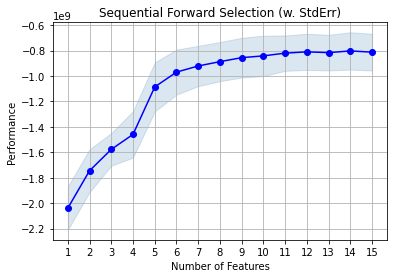

(2, 3, 4, 5, 11, 12, 18, 19, 20, 26, 28, 29, 30, 31)

In [562]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


encoded = X_train.select_dtypes(include='uint8').head().columns.values.tolist()
X_without_encoding = X_train.drop(columns= encoded)

lr = RandomForestRegressor()

sfs = SFS(lr, 
          k_features=(7,15), 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=10)

sfs = sfs.fit(X_without_encoding, y_train)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()
sfs.k_feature_idx_

In [579]:
indexFeature = sfs.k_feature_idx_
indexFeature = np.array(indexFeature)

#Selected features train
selectedFeacture = X_train[X_train.columns[indexFeature]]

encoded = X_train.select_dtypes(include='uint8').head().columns.values.tolist()
FeactureEncoded = X_train[encoded]
selectedFeacture

newX_train= selectedFeacture.join(FeactureEncoded, lsuffix='_caller', rsuffix='_other')

#Selected features test
selectedFeacture = X_test[X_test.columns[indexFeature]]

encoded = X_test.select_dtypes(include='uint8').head().columns.values.tolist()
FeactureEncoded = X_test[encoded]
selectedFeacture

newX_test= selectedFeacture.join(FeactureEncoded, lsuffix='_caller', rsuffix='_other')


In [ ]:
#Prueba con arboles

#Entramiento con metodología de validación usando los mejores hiperparametros, datos de entranmiento

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import numpy as np

regr = RandomForestRegressor(max_depth=4, random_state=0, n_estimators=150, min_samples_split=2, max_features='auto', criterion='mae')
scores = cross_val_score(regr, newX_test, y_train, cv=5, scoring='r2') #Score mse cross_val_predict

print(scores)
print('Intervalo de confianza',np.std(scores))
print('Desempeño',np.mean(scores))


In [584]:
#Normalizar los datos

from sklearn import preprocessing
normalize = preprocessing.StandardScaler().fit(newX_train)
X_train_N = normalize.transform(newX_train)
X_test_N = normalize.transform(newX_test)  


In [585]:
#Prueba con SVR Lineal

#Desempeño con el conjunto test - Selección forward
params = KernelLineal
clf = SVR(C = params['C'], epsilon = params['epsilon'], gamma =params['gamma'], kernel = 'linear').fit(newX_train, y_train)
desempeño = clf.score(newX_test, y_test)     
print('Desempeño', desempeño)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Desempeño 0.4343829330683867
Accuracy: 0.81 (+/- 0.05)


In [ ]:
#Prueba con SVR RBF

#Desempeño con el conjunto test - Selección forward
params = KernelRBF
clf = SVR(C = params['C'], epsilon = params['epsilon'], gamma =params['gamma'], kernel = 'rbf').fit(newX_train, y_train)
desempeño = clf.score(newX_test, y_test)     
print('Desempeño', desempeño)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

## Feature selection - Busqueda secuencial hacia atras

In [ ]:
#Selection Backward
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

encoded = X_train.select_dtypes(include='uint8').head().columns.values.tolist()
X_without_encoding = X_train.drop(columns= encoded)

lr = RandomForestRegressor()

sfs = SFS(lr, 
          k_features=(7,15), 
          forward=False, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=10)

sfs = sfs.fit(X_without_encoding, y_train)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()
sfs.k_feature_idx_

## Ejercicio 2: Completar código 

Analice los siguientes métodos de la teoría vista para los modelos de *regresión polinomial múltiple*, tales como el error cuadrático medio (<font color='blue'>ECM</font>), modelo de regresión múltiple (<font color='blue'>regression</font>), potencia del polinomio (<font color='blue'>potenciaPolinomio</font>) y gradiente descendente. 

Una vez comprenda su funcionamiento proceda a realizar lo siguiente: 
1. Completar el código de la regla de actualización de los parámetros del algoritmo de <font color='blue'>gradiente_descedente</font>: 

$$w_j(iter) = w_j(iter-1) - \eta \frac{\partial E(w)}{\partial w_j}$$ 

2. Graficar el error cuadrático: Error cuadrático medio (ECM) vs. las iteraciones del algoritmo. La gráfica debe llevar título y los correspondientes nombres de los ejes, puedes consultar documentación [aquí](https://matplotlib.org/tutorials/introductory/pyplot.html).

In [195]:
#Error cuadrático medio (criterio para el modelo de regresión polinomial)
def ECM(Y_est,Y):
    N = np.size(Y)
    ecm = np.sum((Y_est.reshape(N,1) - Y.reshape(N,1))**2)/(2*N)
    return ecm 

#Modelo Regresión Múltiple
def regression(X, W):
    Yest = np.dot(X,W)    #con np.dot se realiza el producto matricial. Aquí X es dim [Nxd] y W es dim [dx1]
    return Yest           #Esta variable contiene la salida de f(X,W)

#Potencia de polinomio

def potenciaPolinomio(X,grado):
    X2 = X
    
    if grado != 1:
        for i in range(2,grado+1):
            Xadd = X**i
            X2 = np.concatenate((X2, Xadd), axis=1)
    return X2

In [198]:
"""Gradiente descendente para regresión lineal múltiple
X: Matriz de datos extendida.
W: Vector de parámetros del modelo
eta: Taza de aprendizaje
"""
#X es db que son los datos de tamaño (9357, 13),
#Y 
#eta es la tasa de aprendizaje
def gradiente_descendente(X,Y,eta):
     
    #Extendemos la matriz de X para el parámetro independiente
    unos = np.array([np.ones(np.size(X,0))])
    #Concatenamos el vector de unos con la matriz X
    X = np.concatenate((unos.T, X), axis=1)
    X = X.reshape(np.size(X,0),np.size(X,1))                 #Una forma de concatenar
    
    Y = Y.reshape(np.size(Y), 1)
    
    #Tomamos el número de variables del problema
    d = np.size(X,1)
    
    #Tomamos el número de muestras de la base de datos
    N = np.size(X,0)
    
    
    #Inicializamos el vector de parámetros 
    W = np.zeros((1,d))
    W = W.reshape(np.size(W), 1)
    
    eta = eta
    
    iteraciones = 500
    ecms = np.zeros(iteraciones)
    
    print('X', X)
    
    #Aquí se completa el código
    for iter in range(iteraciones):
        t1 = regression(X, W)
        ecms[iter] = ECM(t1,Y)
        t2 = t1 - Y
        t3 = regression(X.T,t2)
        W = W - eta*t3/N
    print ('Vector de parámetros del modelo:\n')
    print (W)
    print ('\nError Final durante el entrenamiento = ' + str(ecms[-1]))
    
    #Aquí debe completar el código para realizar la gráfica de ecms vs. iteraciones
    plt.plot(ecms) #.plot al mandarle el vector de errores realizara la gráfica considerando el índice como valor del eje X y en el eje Y considerara el valor en ese posición.
    plt.xlabel('Iteraciones')
    plt.ylabel('ECM')
    plt.show()
    
    return W
    

In [ ]:
from sklearn.linear_model import LinearRegression

regr_freq = LinearRegression()
regr_freq.fit(Xtrain, Ytrain)


## Ejercicio 3: Entrenamiento

En este punto debe hacer uso de las funciones escritas en el punto anterior para realizar el proceso de *modelamiento y simulación* de los datos de cargados en el Ejercicio # 1 sobre la predicción del valor de la humedad absoluta en el aire 

A continuación complete el siguiente código llamando a la función <font color='blue'>gradiente_descedente</font> pasandole los parámetros correspondientes (X,y,eta). Debe obtener como salida el vector de parámetros $w$ estimado y la gráfica del error cuadrático medio vs iteraciones.

*Nota*: No olvide definir el grado del polinomio y la taza de aprendizaje (eta)

In [249]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from numpy import random
import math

X = Xtrain.values
Y = Ytrain.values

# #Se modifica la matriz de datos original de acuerdo al grado del polinomio ingresado para el modelo
grado = 1
X2 = potenciaPolinomio(X,grado)

random.seed(1)
#print(np.any(np.isnan(X)))
#print(np.all(np.isfinite(X)))


Xtraining, Xtesting, Ytraining, Ytesting = train_test_split(X, Y, test_size=0.25)

regr_freq = LinearRegression()
regr_freq.fit(Xtraining, Ytraining)
print("RMSE is: {:.2f}\nR_squared is {:.2f}%".format(math.sqrt(np.mean((regr_freq.predict(Xtesting) - Ytesting) ** 2)),
                                                   regr_freq.score(Xtesting,Ytesting)*100))

kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 10)
print(regr_freq.get_params().keys())
fit_intercept=[True, False]
normalize=[True, False]
copy_X=[True,False]
n_jobs=[1,2,3,4,5,6,7,8,9,10]
param_grid = dict(copy_X=copy_X, fit_intercept=fit_intercept, normalize=normalize, n_jobs=n_jobs)
grid_search_xg_freq = GridSearchCV(regr_freq, param_grid, scoring = 'r2', n_jobs = -1, cv=kfold, verbose = 1)
result_gcv_xgb_freq = grid_search_xg_freq.fit(Xtraining, Ytraining.astype(int))
print("Best score: %f using %s" % (result_gcv_xgb_freq.best_score_, result_gcv_xgb_freq.best_params_))
means = result_gcv_xgb_freq.cv_results_['mean_test_score']
stds = result_gcv_xgb_freq.cv_results_['std_test_score']
params = result_gcv_xgb_freq.cv_results_['params']
#print(np.any(np.isnan(Xtraining)))
#print(np.all(np.isfinite(Xtraining)))

eta = 1e-2

print('Despues', np.where(np.isnan(Xtraining)))
regr_freq = LinearRegression()
regr_freq.fit(Xtraining, Ytraining)
W = regr_freq.predict(Xtesting)




RMSE is: 32634.65
R_squared is 84.14%
dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize'])
Fitting 10 folds for each of 80 candidates, totalling 800 fits


/home/sady/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 348 tasks      | elapsed:    2.6s


Best score: 0.760371 using {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}
Despues (array([], dtype=int64), array([], dtype=int64))


[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    5.3s finished
/home/sady/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### Responda:

3.1 ¿Cuál es el número de coeficientes $w$ que se obtienen al ingresar un polinomio de grado 4? ¿Por qué?:



In [ ]:
grado = 4
size = np.size(potenciaPolinomio(X, grado),1)
terminoIndependiente = 1
realSize = size + terminoIndependiente
print(realSize)

3.2 La funci&oacute;n polin&oacute;mica que se est&aacute; usando para grados mayores a 1
est&aacute; incompleta, ¿Por qu&eacute;?:

Debido a que falta el producto entre caracteristicas que resulta de extender la expresión polinomica a un grado mayor a uno.

## Ejercicio 4: Obtener resultados

Identifique la variable "eta" (tasa de aprendizaje $\eta$) en el código anterior, cambie su valor de acuerdo a la siguiente tabla. Haga lo mismo con el valor del grado del polinomio y complete las columnas ECM_Entrenamiento y ECM_Prueba.

Tenga en cuenta que cuando el valor de $\eta$ sea $0.00001$ y el grado del polinomio sea $1$, el valor del ECM de prueba debe ser $703.376$. Esto le servirá de criterio de verificación para la implementación de su algorítmo de gradiente descendente.


In [46]:
import numpy as np
import pandas as pd
import qgrid as qg
randn = np.random.randn
df_types = pd.DataFrame({
    'Tasa de aprendizaje' : pd.Series(['1e-5', '1e-5', '1e-5', '1e-5', '1e-5', '1e-3', '1e-3', '1e-3', '1e-3', '1e-3', '1e-1', '1e-1', '1e-1', '1e-1', '1e-1']),
    'Grado del polinomio' : pd.Series([1,2,3,4,5,1,2,3,4,5,1,2,3,4,5])})
df_types["ECM_Entrenamiento"] = ""
df_types["ECM_Prueba"] = ""
df_types.set_index(['Tasa de aprendizaje','Grado del polinomio'], inplace=True)
df_types["ECM_Entrenamiento"][0] = "774.055"
df_types["ECM_Prueba"][0] = "703.376"
df_types.sort_index(inplace=True)
qgrid_widget = qg.show_grid(df_types, show_toolbar=False)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [ ]:
qgrid_widget.get_changed_df()

## Ejercicio 5: Pruebas

En la celda de código del Ejercicio # 3, comente la línea donde se normalizan las matrices de datos Xtrain y Xtest. Realice pruebas para diferentes valores de $\eta$ y de grado del polinomio de manera similar a los valores que usó en el punto 3. Observe que pasa con el ECM.

#### Responda

5.1 ¿Qué sucede con los valores del ECM?



Los valores del ECM se desbordan

5.2 ¿A qué se debe lo que observa?


Debido a que la convergencia entre caracteristicas se reduce por falta de normalización

5.3.1 ¿Qu&eacute; proceso hace la normalizaci&oacute;n sobre los datos? 




Cambia los valores del dataset a una escala común sin distorsionar las diferencias en los rangos de valores.

5.3.2 Consulte por qu&eacute; es necesaria la normalizaci&oacute;n en el modelo de regresi&oacute;n  y cu&aacute;les son los tipos de normalizaci&oacute;n m&aacute;s comunes. 

Es necesaria porque es posible que algunas características sean cuantitativamente mucho mayores que las demás lo que puede causar que contribuyan a la variación en el término independiente aunque no necesariamente sean más importantes. Algunos de los métodos de normalización son: decimal scaling, min-max normalization y z-score.

5.3.3 ¿Cu&aacute;l de ellos se aplic&oacute; en el laboratorio?

El método utilizado en este laboratorio fue z-score. 
